# Evolution of actors careers post-blockbuster in the film industry
How does a significant box office success impact an actor's subsequent choices and overall career path ?

##  Context

Analyze career trajectories of actors following their roles in high-grossing films using the CMU Movie Dataset

More specifically, explore the following research questions: 
- Does a high-grossing film consistently lead to **continued box office success** for its actors in their subsequent films?
- Is there a noticeable **change in genre or type of characters** portrayed by actors after a significant hit?
- What are the long-term career impacts on actors who have starred in blockbuster hits?

In [1]:
# External imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Loading data:

In [2]:
# Load data
DATA_FOLDER = './MovieSummaries'
CHARACTER_DATASET = DATA_FOLDER + '/character.metadata.tsv'
MOVIE_DATASET = DATA_FOLDER + '/movie.metadata.tsv'
NAME_DATASET = DATA_FOLDER + '/name.clusters.txt'
PLOT_DATASET = DATA_FOLDER + '/plot_summaries.txt'
TVTROPES_DATASET = DATA_FOLDER + '/tvtropes.clusters.txt'

characters_columns = ['wikiID', 'movieID', 'releaseDate', 'charactName', 'birth', 'gender', 'height', 'ethnicity',
                      'name_actor', 'age', 'charActID', 'charID', 'actID']
movies_columns = ['wikiID', 'movieID', 'name_movie', 'releaseDate', 'revenue', 'runtime', 'languages',
                  'countries', 'genres']

characters = pd.read_table(CHARACTER_DATASET, header=None, names=characters_columns)
movies = pd.read_table(MOVIE_DATASET, header=None, names=movies_columns)


In [3]:
# Visualize characters data table
characters.head()

,wikiID,movieID,releaseDate,charactName,birth,gender,height,ethnicity,name_actor,age,charActID,charID,actID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [4]:
# Visualize movies data table
movies.head()

,wikiID,movieID,name_movie,releaseDate,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


## 2) Useful data for our problematics

From this dataset, we first look at the **amount of information** available for each feature. This will help us determine the feasability of our project and guide us for the selection of a relevant subset of data to work on.

With such a large database, it is complex to find a model that both describes the career of an English celebrity in the 40's and that of an actor in Japan in the 2000's. Cultural and economic differences also make it difficult to find a common metric for success. Therefore, we'd like to limit ourselves to a consistent and comprehensible subset of the data.

#### Relevant features
First of all, we need to select the features we are interested in in the database. We decided to define the success of an actor depending on the number of movies they played and their corresponding box office revenue. It might also be relevant to have an understanding of the time line for the description of the career of an actor. In addition we would like to have information about the actor such as age, gender and ethnicity to mitigate a possible bias comming from a diffence in population distribution in our analysis. 

For our analysis we are also interested in the character type played by the actors but this will come later on. (Yassine: Cette phrase ne sert a rien ici, il faut plutot la mettre là ou on va parler de character type)

Thus the feature we want to check are:
* Actor name
* Actor date of birth or age at the time of the movie
* Actor gender
* Actor ethnicity
* Movie box office revenue
* Movie release date

In [5]:
# Make deep copies to make sure not to change original data
characters_copy = characters.copy()
movies_copy = movies.copy()

We want to populate the characters data set with information on the movie in which characters appear. For this we perfom a left merge on characters_copy with movies_copy

In [6]:
# Populate the character dataset with infromations about the movies
character_movies = pd.merge(characters_copy, movies_copy, on=['wikiID', 'movieID', 'releaseDate'] , how='left')

Let's look at the amount of data on movie revenue and movie date that is missing (remeber that a movie can appear multiple times - we can have data about two different actors that appeared in the same movie)

In [7]:
# Compute the total number of movies
nb_movies = len(character_movies['movieID'].unique())

# Compute the number of movies for which we box office revenue
character_movies_revenue = character_movies[['movieID', 'revenue']]
character_movies_revenue = character_movies_revenue.dropna()
nb_movies_revenue = len(character_movies_revenue['movieID'].unique())

# Compute the number of movies for which we release date
character_movies_date = character_movies[['movieID', 'releaseDate']]
character_movies_date = character_movies_date.dropna()
nb_movies_date = len(character_movies_date['movieID'].unique())

# Print the results
print(f"The total number of movies we have is: {nb_movies}")
print(f"The percentage of movies for which we have the revenue: {nb_movies_revenue/nb_movies*100 :.2f}%")
print(f"The percentage of movies for which we have the release date: {nb_movies_date/nb_movies*100 :.5f}%")

The total number of movies we have is: 64330
The percentage of movies for which we have the revenue: 12.78%
The percentage of movies for which we have the release date: 94.23753%


As we can see most movies have a release date but only about 13% have information about the box office revenue. Let's look at this percentage per year (with a temporal axis).

In [8]:
from helpers import complete_date
# Make deep copy and keep only the movies for which we have the release date
character_movies_filtered = character_movies.copy()
character_movies_filtered = character_movies_filtered.dropna(subset='releaseDate')

# Apply complete_date function to all release dates
character_movies_filtered['releaseDate'] = character_movies_filtered['releaseDate'].apply(complete_date)

# Convert to datetime format
character_movies_filtered['releaseDate'] = pd.to_datetime(character_movies_filtered['releaseDate'], errors='coerce')

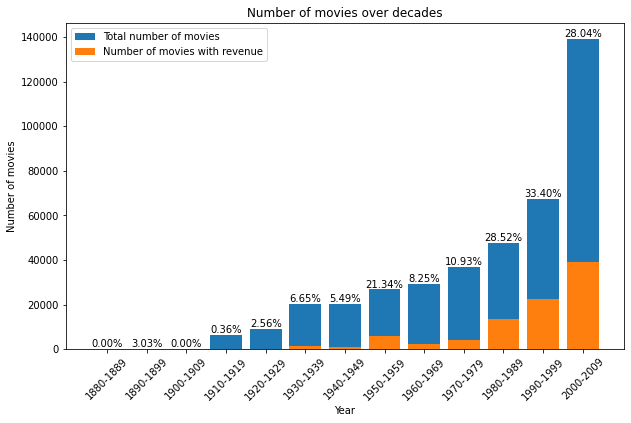

In [9]:
# Add a column with the year of the release date
character_movies_filtered['year'] = character_movies_filtered['releaseDate'].dt.year

# Count the number of movies per 10 years interval:

# For the total number of movies
intervals = pd.cut(character_movies_filtered['year'], bins=range(1880, 2016, 10), right=False)
nb_movies_per_interval = intervals.value_counts().sort_index()

# For movies with the revenue
character_movies_filtered_revenue = character_movies_filtered.dropna(subset='revenue')
intervals_revenue = pd.cut(character_movies_filtered_revenue['year'], bins=range(1880, 2016, 10), right=False)
nb_movies_per_interval_revenue = intervals_revenue.value_counts().sort_index()

plt.figure(figsize=(10, 6))

# Plot bar plot of number of movies per year
tot_bar=plt.bar([f'{b.left}-{b.right-1}' for b in nb_movies_per_interval.index], 
                nb_movies_per_interval.values, label='Total number of movies')
revenue_bar=plt.bar([f'{b.left}-{b.right-1}' for b in nb_movies_per_interval_revenue.index],
                    nb_movies_per_interval_revenue.values, label='Number of movies with revenue')

plt.title('Number of movies over decades')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.tick_params(axis='x', rotation=45)
plt.legend()

# TODO Yassine : maybe put this in a helper fnction?????
# Add the percentage on top of each bar
for i, tot_bar in enumerate(tot_bar):
    height_tot_bar = tot_bar.get_height()
    height_revenue_bar = revenue_bar[i].get_height()
    percent = height_revenue_bar/height_tot_bar *100
    plt.text(tot_bar.get_x() + tot_bar.get_width() / 2, height_tot_bar + 5, 
             f'{percent:.2f}%', ha='center', va='bottom')

# Show graph
plt.show()

From this graph we can see that the percentage of revenue data increases through the year. It might thus be more relevant to perform our analysis on a subset of the years for which the revenue information is more present. We could for example only take movies starting from 1980. (Yassine: We can even take movies starting from 1950 even if from 70 to 80 the percentage is not high?)

In [10]:
# Remove all movies that where released before 1980
character_movies_filtered = character_movies_filtered[character_movies_filtered.year >= 1980]

# Look at the percentage of revenue data in this subset:
# Compute the total number of movies
nb_movies_1980 = len(character_movies_filtered['movieID'].unique())

# Compute the number of movies for which we box office revenue
character_movies_filtered_revenue_1980 = character_movies_filtered[['movieID', 'revenue']]
character_movies_filtered_revenue_1980 = character_movies_filtered_revenue_1980.dropna()
nb_movies_1980_revenue = len(character_movies_filtered_revenue_1980['movieID'].unique())

print(f"The percentage of movies for which we have the revenue after 1980: {nb_movies_1980_revenue/nb_movies_1980*100 :.2f}%")

The percentage of movies for which we have the revenue after 1980: 18.83%


Let's have a look at the amount of revenue data we have per country

In [11]:
from helpers import sort_words, create_words_database
# Make deep copy for the country analysis
df_country = character_movies_filtered.copy()

# Change countries into a list of String
df_country['countries'] = df_country['countries'].str.extract(r'\"([\w\s]+)\"')
df_country['countries'] = df_country['countries'].apply(lambda x: [x] if pd.notna(x) else ['Unknown'])

# Count the number of movies per country
countries_list = df_country['countries'].tolist()
# Flaten the list of countries and sort the resulting list
stored_countries = sort_words(countries_list)
# Count the number of repetition per country
nb_movies_per_country = create_words_database(stored_countries)
# Sort by ascending order of movies made per country
nb_movies_per_country = dict(sorted(nb_movies_per_country.items(), key=lambda item: item[1]))
# Remove movies that shot less than 200 movies
nb_movies_per_country = {country: nb for country, nb in nb_movies_per_country.items() if nb >= 200}


# Count the number of movies with known revenue per country
countries_list = df_country.dropna(subset=['revenue'])['countries'].tolist()
# Flaten the list of countries and sort the resulting list
stored_countries = sort_words(countries_list)
# Count the number of repetition per country
nb_movies_per_country_revenue = create_words_database(stored_countries)
# Sort by ascending order of movies made per country
nb_movies_per_country_revenue = dict(sorted(nb_movies_per_country_revenue.items(), key=lambda item: item[1]))


# TODO comment these lines (Xenia? j'ai pas entierement compris)
country_200_movie = list(nb_movies_per_country.keys())
nb_movies_per_country_revenue = {country: nb for country, nb in nb_movies_per_country_revenue.items() if country in country_200_movie}
nb_movies_per_country_revenue.update({country: 0 for country in country_200_movie if country not in nb_movies_per_country_revenue})
nb_movies_per_country_revenue = {country: nb_movies_per_country_revenue[country] for country in nb_movies_per_country}


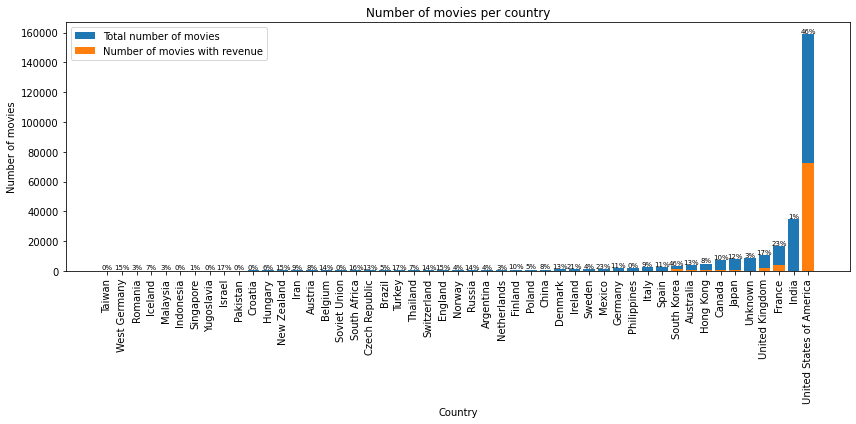

In [12]:
# Extract the names of the countries and the value from each dictionary
country_names = list(nb_movies_per_country.keys())
nb_movies_tot = list(nb_movies_per_country.values())
nb_movies_revenue = list(nb_movies_per_country_revenue.values())

# Make a list of indices for the position of the bars
indices = range(len(country_names))

# Plot histogram
plt.figure(figsize=(12, 6))
bars_tot = plt.bar(indices, nb_movies_tot, label='Total number of movies')
bars_revenue = plt.bar(indices, nb_movies_revenue, label='Number of movies with revenue')

# Add label and title
plt.xlabel('Country')
plt.ylabel('Number of movies')
plt.title('Number of movies per country')
plt.xticks(indices, country_names, rotation=90)

# Add the percentage on top of each bar
for i, bars_tot in enumerate(bars_tot):
    height_bars_tot = bars_tot.get_height()
    height_bars_revenue = bars_revenue[i].get_height()
    percent = height_bars_revenue/height_bars_tot *100
    plt.text(bars_tot.get_x() + bars_tot.get_width() / 2, height_bars_tot + 5,
             f'{percent:.0f}%', ha='center', va='bottom', size=7)


# Show legend and histogram
plt.legend()
plt.tight_layout()
plt.show()


From this plot we can see that the majority of the movies in our dataset come from the U.S. and they also have a high percentage of revenue information. From this we decided to keep only movies that were made in the U.S.

In [13]:
# Keep only movies that where made in the U.S.
character_movies_filtered = character_movies_filtered[
    character_movies_filtered.countries.apply(lambda x:"United States of America" in x)]

# Keep only movies for which we have the revenue
character_movies_filtered = character_movies_filtered.dropna(subset='revenue')

# Compute the number of movies left
nb_tot_filtered_movies = len(character_movies_filtered['movieID'].unique())

print(f'The remaining number of movies after the filtration is: {nb_tot_filtered_movies}.')

The remaining number of movies after the filtration is: 5341.


Now that we have filtered our data to have only U.S. movies which where released after the year 1980 (including it) and that have the revenue data we will look at the data we have on the actors.

In [14]:
# Compute the total number of characters and actors
nb_actors = len(character_movies_filtered['name_actor'].unique())

# Compute the number of actors for which we have the name
character_movies_name = character_movies_filtered[['name_actor']]
character_movies_name = character_movies_name.dropna()
nb_actors_name = len(character_movies_name['name_actor'].unique())

# Compute the number of actors for which we have the date of birth
character_movies_birth = character_movies_filtered[['birth', 'name_actor']]
character_movies_birth = character_movies_birth.dropna()
nb_actors_birth = len(character_movies_birth['name_actor'].unique())

# Computer the number of actors for which we have the age (positive number)
character_movies_age = character_movies_filtered[['age', 'name_actor']]
character_movies_age = character_movies_age.dropna()
character_movies_age = character_movies_age[character_movies_age.age>=0]
nb_actors_age = len(character_movies_age['name_actor'].unique())

# Compute the number of actors for which we have the gender
character_movies_gender = character_movies_filtered[['gender', 'name_actor']]
character_movies_gender = character_movies_gender.dropna()
nb_actors_gender = len(character_movies_gender['name_actor'].unique())


# Compute the number of actors for which we have the ethnicity
character_movies_ethnicity = character_movies_filtered[['ethnicity', 'name_actor']]
character_movies_ethnicity = character_movies_ethnicity.dropna()
nb_actors_ethnicity = len(character_movies_ethnicity['name_actor'].unique())

# Print the results
print(f"The total number of actors we have is: {nb_actors}")
print(f"The percentage of actors for which we have the name is: {nb_actors_name/nb_actors*100 :.5f}")
print(f"The percentage of actors for which we have the birth date is: {nb_actors_birth/nb_actors*100 :.2f}")
print(f"The percentage of actors for which we have the age is: {nb_actors_age/nb_actors*100 :.2f}")
print(f"The percentage of actors for which we have the gender is: {nb_actors_gender/nb_actors*100 :.2f}")
print(f"The percentage of actors for which we have the ethnicity is: {nb_actors_ethnicity/nb_actors*100 :.2f}")

The total number of actors we have is: 26103
The percentage of actors for which we have the name is: 99.99617
The percentage of actors for which we have the birth date is: 61.56
The percentage of actors for which we have the age is: 60.72
The percentage of actors for which we have the gender is: 84.85
The percentage of actors for which we have the ethnicity is: 15.68


From this analysis we can see that we have enough information on the gender and on the age (esp. with birth date) of the actors. However ethnicity data is often missing. Thus it might be good to filter only for age and gender.

In [15]:
# Filter for birth date
character_movies_filtered = character_movies_filtered.dropna(subset=['birth'])

# Filter for gender (NaN and aberrant values)
character_movies_filtered = character_movies_filtered.dropna(subset=['gender'])
character_movies_filtered = character_movies_filtered[
    (character_movies_filtered.gender=='F') | (character_movies_filtered.gender=='M')]

# Compute the remaining number of actors and movies
nb_tot_filtered_movies = len(character_movies_filtered['movieID'].unique())
nb_tot_filtered_actors = len(character_movies_filtered['name_actor'].unique())

print(f'The remaining number of movies is: {nb_tot_filtered_movies}.')
print(f'The remaining number of actors is: {nb_tot_filtered_actors}.')

The remaining number of movies is: 5317.
The remaining number of actors is: 15912.


Now that we have reduced our dataset to this smaller subset we can see that data handling will not be a problem.

We will need to further filter our dataset to keep only actors that played at least in two movies. Let's first look at the distribution of the number of movies played by actor.

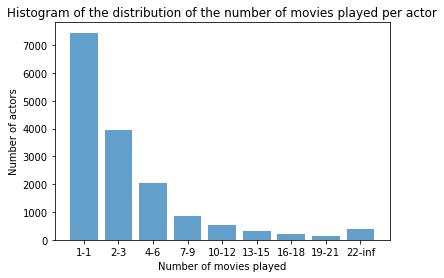

In [16]:
# List all actors name (for filtered data)
actors_names = character_movies_filtered['name_actor'].tolist()

#count the repertition number of each actor name
nb_mov_actor = create_words_database(sorted(actors_names))

# Sort the actors by ascending order of movies played
nb_mov_actor = dict(sorted(nb_mov_actor.items(), key=lambda item: item[1]))

# Define intervals
intervals = [1, 3, 6, 9, 12, 15, 18, 21]

# Initialize a dictionary to stock the number of actors in each interval
actors_per_intervalle = {i: 0 for i in range(len(intervals) + 1)}

# Count the number of actors in each interval
for actor, index in nb_mov_actor.items():
    for i, threshold in enumerate(intervals):
        if index <= threshold:
            actors_per_intervalle[i] += 1
            break
    else:
        actors_per_intervalle[len(intervals)] += 1

# Plot histogram
plt.bar(actors_per_intervalle.keys(), actors_per_intervalle.values(), align='center', alpha=0.7)
plt.xticks(list(actors_per_intervalle.keys()), [f"{i+1}-{j}" for i, j in zip([0] + intervals, intervals + [float('inf')])])
plt.xlabel('Number of movies played')
plt.ylabel("Number of actors")
plt.title('Histogram of the distribution of the number of movies played per actor')
plt.show()

From this histogram we see that wee many acotrs played in only one movie so we will further decrease the size of our dataset when filtering for actors that played in at least two movies.

In [17]:
from helpers import at_least_n_movies

# Apply filtering function to actor dictionary
filtered_actors = dict(filter(at_least_n_movies, nb_mov_actor.items()))

# Filter dataset
character_movies_filtered = character_movies_filtered[character_movies_filtered['name_actor'].isin(filtered_actors.keys())]

# Compute the remaining number of actors and movies
nb_tot_filtered_movies = len(character_movies_filtered['movieID'].unique())
nb_tot_filtered_actors = len(character_movies_filtered['name_actor'].unique())

print(f'The remaining number of movies is: {nb_tot_filtered_movies}.')
print(f'The remaining number of actors is: {nb_tot_filtered_actors}.')

ImportError: cannot import name 'at_least_n_movies' from 'helpers' (/Users/yassineabdennadher/Desktop/ada-2023-project-pinacolada23/helpers.py)

### 3) Character type:

TODO: detail how we are going to find the character type of an actor and how we will define the distance between two characters played by an actor.